In [1]:
import nltk
import pandas
import matplotlib
import seaborn
import numpy

In [2]:
alpha = pandas.read_csv('Reviews.csv')

In [3]:
alpha.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
alpha.info()
#columns to drop :
#id  product id kai userid
#profile name
#time
#numberator  denominator ??


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
alpha.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
alpha['Score'].value_counts()
#well most of the are stars....    63%

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [7]:
363122/568454


0.6387887146541321

In [8]:
alpha['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

Text(0.5, 0, 'Review Stars')

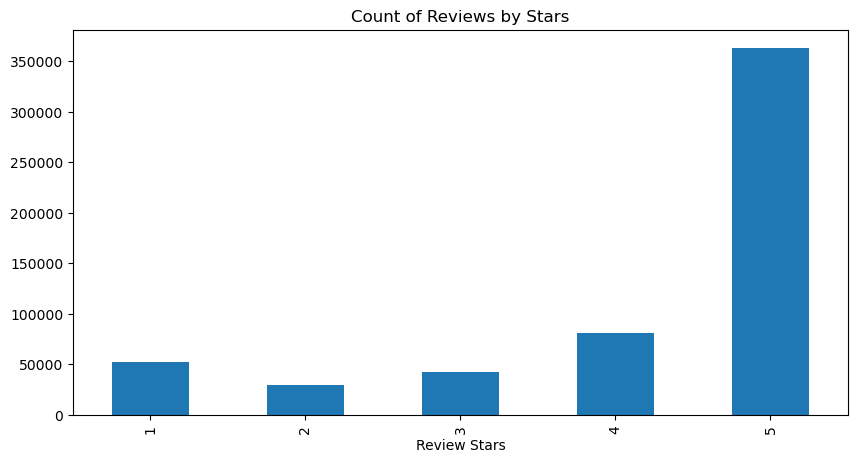

In [9]:
ax = alpha['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')


In [10]:
example = alpha['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [11]:
nltk.download('punkt') #!!

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\konst\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
tokens = nltk.word_tokenize(example)


In [16]:
tokens 

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\konst\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
tagged = nltk.pos_tag(tokens)


In [19]:
tagged  #verg nouns pronouns etc...


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [20]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\konst\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [21]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\konst\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [22]:
entities = nltk.chunk.ne_chunk(tagged)


In [24]:
entities.pprint() #pretty print , makes small sentences

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER 

In [25]:
#Stop words are removed  ...eg. this i you am etc
#each word is scored and combined to a total score.

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\konst\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
sia = SentimentIntensityAnalyzer()

In [29]:

sia#this is our machine

In [30]:
sia.polarity_scores("i want to die in hell like a butterfly")

{'neg': 0.556, 'neu': 0.196, 'pos': 0.248, 'compound': -0.7717}

In [31]:
sia.polarity_scores("i want to die in hell as a spider")

{'neg': 0.616, 'neu': 0.29, 'pos': 0.094, 'compound': -0.8481}

In [32]:
sia.polarity_scores("i love you my happy valentine")

{'neg': 0.0, 'neu': 0.275, 'pos': 0.725, 'compound': 0.836}

In [33]:
ex01= "i am jack"

In [34]:
sia.polarity_scores(ex01)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [35]:
ex02="i am jack the ripper"

In [36]:
sia.polarity_scores(ex02)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [37]:
sia.polarity_scores(example)
#the best so far!!


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [38]:
alpha=alpha.head(500)

In [40]:
res = {} #dictionary where we put the output
for i, row in tqdm(alpha.iterrows(), total=len(alpha)):#total is for the blue bar (loading)
    text = row['Text']
    myid = row['Id']#this is id is like index
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [41]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [42]:
res2 = [] #same result using a list(if i dont care about the id's)
for i, row in tqdm(alpha.iterrows()):
    text = row['Text']
    res2.append(sia.polarity_scores(text))

0it [00:00, ?it/s]

In [98]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [43]:
vaders = pandas.DataFrame(res)

In [44]:
vaders

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0550,0.0000,0.0560,0.1000,0.0000,0.0000,0.0590,0.0250,0.041,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.7040,0.7170,0.8550,0.6450,0.7880,0.5540,0.7990,0.7620,0.904,0.6780
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.2410,0.2830,0.0890,0.2540,0.2120,0.4460,0.1420,0.2120,0.055,0.3220
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9287,0.9367,0.5976,0.6486,0.9743,0.9725,0.7833,0.9848,0.128,0.9811


In [45]:
vaders = pandas.DataFrame(res).T

In [46]:
vaders#

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [47]:
vaders=vaders.reset_index()#old index=column. and inserts a new index

In [48]:
vaders=vaders.rename(columns={'index':'Id'}) #column rename so as it matches with the original

In [49]:
vaders


,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [50]:
mydata = vaders.merge(alpha, how='left') 

In [51]:
mydata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


Text(0.5, 1.0, 'Compund Score by Amazon Star Review')

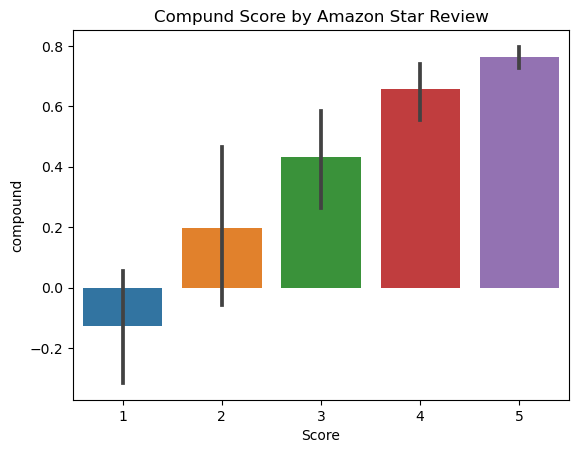

In [53]:
ax = seaborn.barplot(data=mydata, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
#more stars=better rates

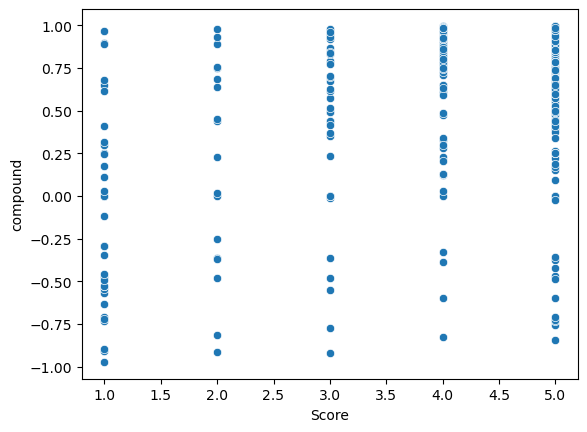

In [54]:
ax = seaborn.scatterplot(x='Score', y='compound',data=mydata)


In [55]:
mydata = mydata.sort_values(by='Score')

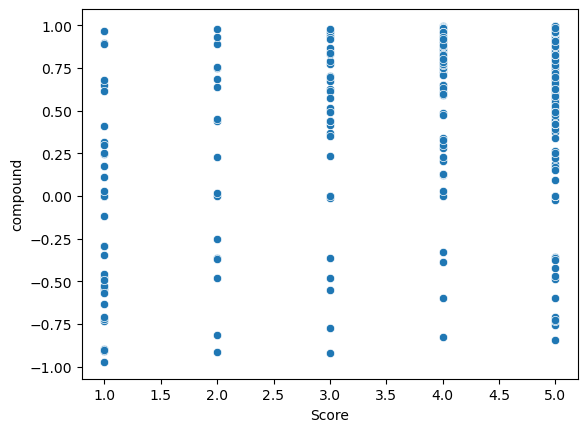

In [56]:
ax = seaborn.scatterplot(x='Score', y='compound',data=mydata) #fixed 

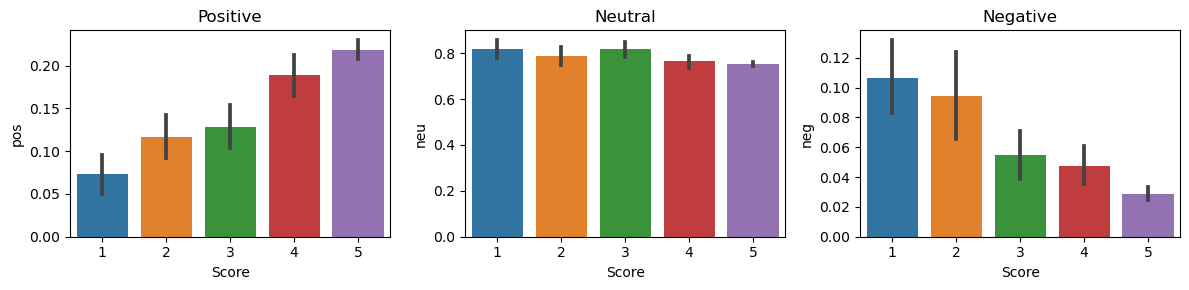

In [61]:
fig, axs = matplotlib.pyplot.subplots(1, 3, figsize=(12, 3))
seaborn.barplot(data=mydata, x='Score', y='pos', ax=axs[0])
seaborn.barplot(data=mydata, x='Score', y='neu', ax=axs[1])
seaborn.barplot(data=mydata, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
matplotlib.pyplot.tight_layout()


# ROBERTA

In [63]:
#more advanced model

In [64]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [65]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#already trained model on twitter comments

In [66]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [67]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [68]:
encoded_text = tokenizer(example, return_tensors='pt')
#one hot encoding of the 'example' using pytorch

In [69]:
encoded_text

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [70]:
output = model(**encoded_text)

In [71]:
output#neg neut and positive :

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [72]:
scores = output[0][0].detach().numpy()#select only the scores from the output

In [73]:
scores

array([ 3.143629 , -0.7106685, -2.655895 ], dtype=float32)

In [74]:
scores=softmax(scores) #transform it to nltk range so as to compare the scores

In [75]:
scores

array([0.9763551 , 0.02068748, 0.00295738], dtype=float32)

In [41]:
scoresDict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

In [43]:
scoresDict

{'roberta_neg': 0.9763551,
 'roberta_neu': 0.020687481,
 'roberta_pos': 0.0029573755}

In [76]:
#nltk VS roberta

In [77]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [78]:
alpha=alpha.head(500)

In [79]:
example
    

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [52]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [80]:
#Roberta is using GPU and your code could be really slow if your system isnt good enough 
#so we are not gonna make the same procedure as we did before caus it's gonna last for centuries

In [81]:
mydata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
361,362,0.228,0.772,0.000,-0.7340,B0041QJSJS,A20B2BU1ZPY9AW,Mr Coffee,0,1,1,1345507200,Bitter,A very bitter tasting coffee even when enhance...
282,283,0.028,0.934,0.038,0.1779,B001D07IPG,A27UE9HJRZ22YI,"Louie's Mom ""Compulsive Reader""",0,1,1,1280880000,Over priced chips and lack rice taste,I paid $1.79 for a 2 ounce pkg of these at lun...
381,382,0.318,0.515,0.167,-0.7184,B003YXWAF8,A1KQXO716WOOD6,Allison Beegle,7,13,1,1309305600,Waste of money,These condiments are overpriced and terrible. ...
168,169,0.186,0.740,0.074,-0.5283,B0064KO0BU,A34D61RQILOKIJ,TampaBayGal,1,1,1,1350086400,Not Banana Runts,"Besides being smaller than runts, they look th..."
312,313,0.000,1.000,0.000,0.0000,B002X9JNYU,AVPSSODZIDABZ,HELfromBL,1,3,1,1323388800,what quantity is it!,I wouldn't even think of buying this product u...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,0.000,0.824,0.176,0.6983,B00029XIZI,A2S72TUJDQUBMH,Nadia,0,0,5,1236124800,Miracle,My Scotties were full of hot spots and when I ...
186,187,0.016,0.842,0.142,0.9944,B000NY8ODS,A1IU7S4HCK1XK0,Joanna Daneman,2,2,5,1333843200,"Make a fresh fruit tart, light and beautiful",This packet of glaze is the secret to making t...
185,186,0.189,0.811,0.000,-0.5994,B001KUUNP6,A18VJ0WOQAIZYD,Ean Behr,0,0,5,1337299200,yum falafel,We had trouble finding this locally - delivery...
183,184,0.000,0.857,0.143,0.9577,B001KUUNP6,A262Z0S6PT9U16,Lee Thombley,3,3,5,1292716800,Perfect for gluten-free chocolate chip cookies,We made chocolate chip cookies with BRM Garban...


In [82]:
mydata.query('Score==1').sort_values('pos',ascending=False)
 

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
324,325,0.213,0.514,0.274,0.3185,B000JEHAHS,A2CU16YU1KEOUY,"Hurricane Ridge ""Chris""",5,19,1,1168300800,Never Arrived,So we cancelled the order. It was cancelled w...
164,165,0.025,0.752,0.223,0.8957,B000ITVLE2,ARTBQH9WOZTIV,"Billy Wilson ""amzrview""",0,4,1,1269216000,Tasteless but low calorie,Seriously this product was as tasteless as the...
254,255,0.091,0.736,0.172,0.4118,B0048IC328,A1W867A8DSHFHC,no name,1,3,1,1339804800,Don't Waste Your Money,"I felt energized within five minutes, but it l..."
233,234,0.103,0.729,0.169,0.2481,B003ZFXJDW,A2KPPGFMPD20M6,Linda Albert,0,0,1,1343692800,Furniture Polish Taste,"Terrible! Artificial lemon taste, like Pledge ..."
381,382,0.318,0.515,0.167,-0.7184,B003YXWAF8,A1KQXO716WOOD6,Allison Beegle,7,13,1,1309305600,Waste of money,These condiments are overpriced and terrible. ...
335,336,0.046,0.800,0.154,0.6796,B00469VSJI,A1447CDAPZGLYV,SANA AWAR,0,0,1,1326499200,No no,Serveice delivery with the seller was excellen...
73,74,0.093,0.762,0.144,0.9665,B0059WXJKM,A25VFHVGI4CFTP,Diana Robinson,0,1,1,1335744000,Warning! WARNING! -ALCOHOL SUGARS!,Buyer Beware Please! This sweetener is not for...
208,209,0.050,0.820,0.130,0.8913,B0028C44Z0,A3BJ9NS09YGQT5,"Atl Chris ""Atl Chris""",0,3,1,1314489600,These just don't do it for me as breath mints,"To me, these are nothing like the regular Alto..."
75,76,0.106,0.768,0.126,0.1098,B001EPPI84,A27TZ4WBU7N0YF,I. So,0,0,1,1275004800,No Tea Flavor,No tea flavor at all. Just whole brunch of art...
229,230,0.025,0.854,0.121,0.6478,B001L4ELRW,A1AK335P17JXL0,Victoria Brown,0,0,1,1345593600,Not Good,This candy is not as described. The middle is ...


In [83]:
mydata.query('Score==1').sort_values('pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [84]:
#sarcastic comment . Very difficult to evaluate

In [85]:
mydata.query('Score==1').sort_values('pos',ascending=False)['Text'].values[1]

'Seriously this product was as tasteless as they come. There are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. You just have to season it or combine it with something else to share the flavor.'

In [86]:
mydata.query('Score==5').sort_values('neg',ascending=False)['Text'].values[0]


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [87]:
#the most 'negative' 5star review

Roberta is very good with sarcasm and cleverish comments but slow. Vader is ok overall but not as smart
as roberta.

ΒΟΝUS for lazy guys

In [88]:
from transformers import pipeline



In [89]:
machine = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\konst\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\konst\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [90]:
machine('hello')

[{'label': 'POSITIVE', 'score': 0.9995185136795044}]

In [91]:
machine('i love you')

[{'label': 'POSITIVE', 'score': 0.9998656511306763}]

In [92]:
machine('i wanna die')

[{'label': 'NEGATIVE', 'score': 0.9867523908615112}]

In [93]:
machine('if i die everything will be better for the entire universe and everyone will be happy')

[{'label': 'POSITIVE', 'score': 0.9996299743652344}]

In [95]:
#simple fast but not reliable, NOT the best choice